<a href="https://colab.research.google.com/github/rpizarrog/simulacion/blob/main/python%20casos/Caso_13_Variables_aleatorias_continuas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Variables aleatorias continuas

Existen distintas distribuciones que permiten tratar con variables aleatoris continuas

- Distribución uniforme continua
- Distribución normal
- Distribución t student
- Distribucuón exponencial
- Distribución chi cuadrada
- Distribución f de Fisher
- Entre otras....

Generar 100 números aleatorios de cada disribución y visualizar su histograma y densidad.

Existenn deiversas alternaivas para generar números aleatorios de variables continuas en Python.

Este caso se ajsutará a utilizar la bilioteca *from scipy.stats* y la correspondiente distribución.




# Desarrollo



## Cargar librerias


In [23]:
import random
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from scipy.stats import uniform  # uniforme continua
from scipy.stats import norm # normal

# from IPython.display import display, HTML # Para html tablas ...

## Crear funciones



In [24]:
def f_visualizar_histograma_continua (datos, k):
  # Crear un gráfico de distribución de la variable continua
  sns.histplot(data=datos, kde=True)
  plt.xlabel(datos.columns[0])
  plt.ylabel('Frecuencia')
  plt.title('Distribución de Variable Continua')
  plt.show()

# Recibe una datos con una variable continua y el número de cortes o clases
# que sirven para construir tabla basados en los k clases
def f_construye_tabla_distribucion_continua(datos, k):
  # Crear una tabla de frecuencia
  tabla_frecuencia = pd.cut(datos.iloc[:, 0], bins=k, include_lowest=True).value_counts().reset_index()
  tabla_frecuencia.columns = ['Clase', 'Frec']
  # tabla_frecuencia

  # Ordenar la tabla de frecuencia por el intervalo
  tabla_frecuencia = tabla_frecuencia.sort_values(by='Clase')
  tabla_frecuencia = tabla_frecuencia.reset_index(drop=True) # Regenera index

  # Generar columnas siguientes
  tabla_frecuencia['Frec Rel'] = tabla_frecuencia['Frec'] / n
  tabla_frecuencia['Frec Porc'] = tabla_frecuencia['Frec'] / n * 100
  tabla_frecuencia['Frec Ac'] = tabla_frecuencia['Frec'].cumsum()

  return tabla_frecuencia

## Sembrar la semilla


In [25]:
random.seed(2023) ## semilla año 2023

# Distribución uniforme

La distribución uniforme continua es una familia de distribuciones de probabilidad para variables aleatorias continuas, tales que para cada miembro de la familia, todos los intervalos de igual longitud en la distribución en su rango son igualmente probables. El dominio está definido por dos parámetros, a  y b, que son sus valores mínimo y máximo respectivamente.


La distribución o modelo uniforme puede considerarse como proveniente de un proceso de extracción aleatoria .El planteamiento radica en el hecho de que la probabilidad se distribuye uniformemente a lo largo de un intervalo . Así : dada una variable aleatoria continua, x
 , definida en el intervalo [a,b]
 de la recta real, se dice que x
 tiene una distribución uniforme en el intervalo [a,b].


¿En dónde se utiliza?

Todos los valores en un intervalo tienen la misma probabilidad.
Se usa para modelar situaciones en las que todas las observaciones son igualmente probables, como en algunas simulaciones o muestreos.

### Fórmula de la densidad

$$
f(x) =
\begin{cases}
\frac{1}{b-a} &,\, \text{para }a\leq x \leq b ,\\
0&,\, \text{en cualquier otro caso }
\end{cases}
$$


### Ejercicio
La entrega de Pizzas llega entre 15 y 45 minutos de manera uniforme. Simular 100 entregas y luego calcular la probabilida de que la entrega llegue entre 20 y 30 minutos.



In [77]:
# Generar 100 números aleatorios en una distribución uniforme entre 15 y 45 minutos
min = 15
max = 45 - min # o sea 30 a partir de 15 que da 45 el valor máximo
n = 100

# Crear una variable aleatoria uniforme continua
uniform_rv = uniform(loc = min, scale = max)  # los define el inicio 15 y scale la amplitud

# Generar números aleatorios a partir de la distribución
numeros_aleatorios = uniform_rv.rvs(size=n)


# Imprimir los números aleatorios
np.round(numeros_aleatorios, 4)

array([17.0242, 28.3594, 15.6339, 29.3411, 29.7857, 21.2778, 34.416 ,
       26.2409, 31.8787, 18.4094, 27.8763, 29.6818, 21.3713, 18.3433,
       28.1332, 30.4768, 41.2074, 35.8919, 22.3709, 20.0267, 24.9581,
       22.4348, 22.665 , 16.4055, 24.2693, 40.0973, 23.1914, 42.6795,
       15.7309, 36.821 , 38.4094, 34.6154, 34.238 , 35.8394, 26.5508,
       27.7   , 16.9637, 38.8985, 22.2239, 19.4904, 43.2222, 37.9464,
       39.6253, 42.5291, 38.6597, 38.9295, 15.5744, 44.5824, 42.7911,
       22.2793, 41.587 , 32.0963, 25.7181, 25.9979, 35.6829, 16.7869,
       23.1023, 26.153 , 32.0542, 16.6653, 31.585 , 22.5826, 31.1169,
       25.6094, 17.754 , 41.6715, 23.2959, 44.1826, 17.5342, 43.7163,
       31.2582, 34.3325, 31.8046, 44.3923, 42.4845, 42.3733, 35.0633,
       22.9661, 16.9245, 44.4244, 36.5317, 23.5332, 27.1168, 42.7742,
       36.5165, 28.9649, 28.7584, 35.1715, 19.9086, 33.7682, 43.7545,
       32.3315, 33.8197, 22.219 , 31.0213, 40.6335, 20.8725, 43.2889,
       39.999 , 26.3

### Visualizar histograma y su densidad


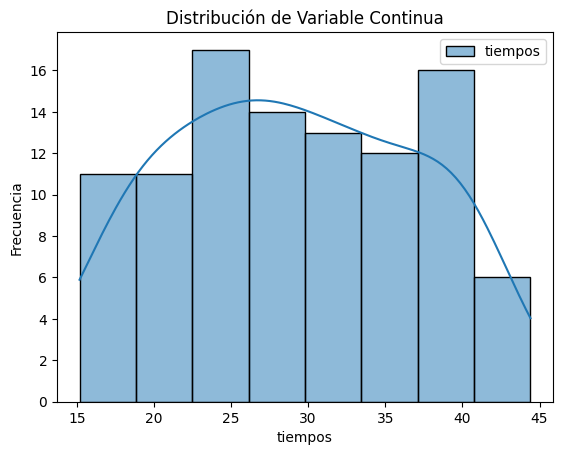

In [69]:
# Convertir los números aleatorios a un data.frame
datos = pd.DataFrame({"tiempos" :numeros_aleatorios})
k = 7 # Numero de cortes o divisiones o clases en el histograma

# Solo mandar llamar la función

f_visualizar_histograma_continua (datos, k)

### Curva de densidad y probabilidad área bajo la curva

Se visualiza sólo la curva de densidad  por cada valor de los datos.

¿Cuál es la probabilidad de que la piza llegue entre 20 y 30 minutos?



Se utiliza la función *pdf()* de la librería *scipy.stats*



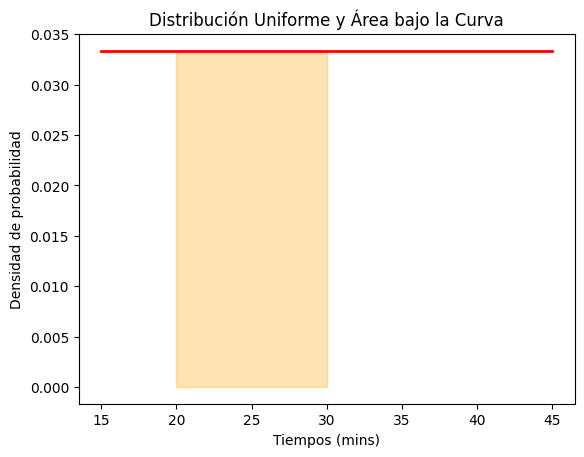

In [79]:
# Intervalo a visualizar
intervalo_a = 20
intervalo_b = intervalo_a + 10  # Hasta 30

# Crear una secuencia de valores en el rango completo de la distribución uniforme
x = np.linspace(min, max+min)

# Calcular la densidad de probabilidad de la distribución uniforme
densidad = uniform.pdf(x, loc=min, scale=max)

# Dibujar la curva de densidad de probabilidad
plt.plot(x, densidad, 'r-', lw=2)

# Resaltar el área bajo la curva entre 20 y 30
x_fill = np.linspace(intervalo_a, intervalo_b)
y_fill = uniform.pdf(x_fill, loc=intervalo_a, scale=intervalo_b)
plt.fill_between(x_fill, y_fill, alpha=0.3, color='orange')

# Etiquetas y título del gráfico
plt.xlabel('Tiempos (mins)')
plt.ylabel('Densidad de probabilidad')
plt.title('Distribución Uniforme y Área bajo la Curva')

# Mostrar el gráfico
plt.show()

### La probabilidad

¿Cúal es la probabilidad de que la Pizza llegue entre 20 y 30 minutos?.


In [66]:
# Calcular la probabilidad de que llegue entre 20 y 30 minutos
probabilidad = uniform.cdf(intervalo_b, loc=min, scale=max) - uniform.cdf(intervalo_a, loc=min, scale=max)
#probabilidad = probabilidad * 100
print(f"La probabilidad de que la pizza llegue entre 20 y 30 minutos es: {probabilidad:.2f} %")
print ("Es lo que representa el área amarilla con respecto al 100% en la imagen anterior")

La probabilidad de que la pizza llegue entre 20 y 30 minutos es: 0.33 %
Es lo que representa el área amarilla con respecto al 100% en la imagen anterior


## Distribución normal

Forma de campana, simétrica alrededor de la media.
Se utiliza para modelar datos en muchas aplicaciones, desde la altura de las personas hasta errores de medición y mucho más.

La fórmula para la densidad de una distribución  normal .

$$
f(x) =\frac{1}{\sigma \cdot \sqrt{2 \cdot \pi}}\cdot e
^{\frac{-1}{2}\cdot ( \frac {x - \mu}{\sigma}) ^2}
$$

### Ejercicio

La estatura promedio de los alumnos varones del ITD con media y desviación estándar.

Se generan $3500$ estaturas de varones con estatura en media igual a $170$ cms y $10$ cms de desviación estándar.

$$
\mu = 170
$$
$$
\sigma = 10
$$

In [52]:
media = 170
desv_std = 10
n = 3500 # alumnos del ITD

# Genera 100 valores aleatorios de una distribución normal
numeros_aleatorios = norm.rvs(loc=media, scale=desv_std, size=n)


### Visualizar histograma y densidad de distribución normal



     estaturas
0   165.763961
1   185.372238
2   156.165964
3   177.541688
4   152.518225
..         ...
95  191.258778
96  178.304845
97  170.622800
98  136.353042
99  166.200948

[100 rows x 1 columns]
       estaturas
3400  174.988915
3401  175.376023
3402  174.793591
3403  158.269812
3404  158.180156
...          ...
3495  168.883638
3496  155.396865
3497  175.625598
3498  175.456783
3499  164.800784

[100 rows x 1 columns]


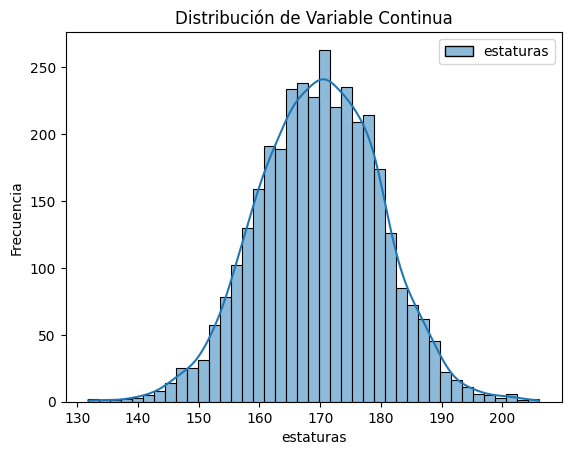

In [53]:
# Convergir los números aleatoios a un data.frame
datos = pd.DataFrame({"estaturas" :numeros_aleatorios})

# Los primeros y últimos 100
print(datos.head(100))
print(datos.tail(100))
k = 7 # Numero de cortes o divisiones o clases


f_visualizar_histograma_continua (datos, k)

### Curva de densidad y probabilidad área bajo la curva

Se muestra sólo la densidad de la curva con los datos de estaturas.



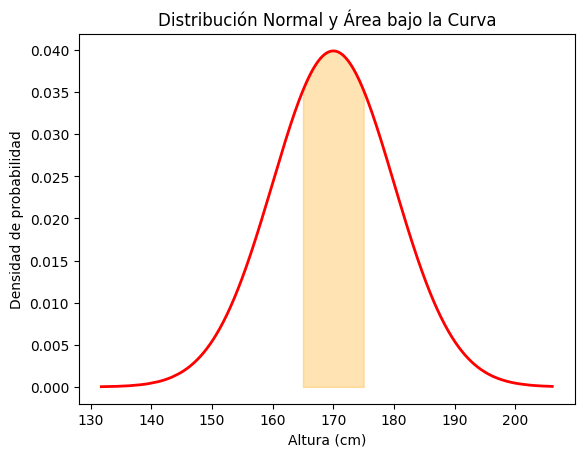

In [58]:
# Parámetros del intervalo
intervalo_a = 165
intervalo_b = 175

# Crear un gráfico de densidad de la distribución normal

# Crear una secuencia de valores entre el valor mínimo y máximo de los datos
x = np.sort(datos['estaturas']) # que vayan ordenados

# Calcular la densidad de probabilidad para la distribución normal
dens = norm.pdf(x, media, desv_std)

# Dibujar la curva de densidad de probabilidad
plt.plot(x, dens, 'r-', lw=2)

# Resaltar el área bajo la curva entre 165 y 175
x_fill = np.linspace(start=intervalo_a, stop=intervalo_b)
y_fill = norm.pdf(x_fill, media, desv_std)
plt.fill_between(x_fill, y_fill, alpha=0.3, color='orange')

# Etiquetas y título del gráfico
plt.xlabel('Altura (cm)')
plt.ylabel('Densidad de probabilidad')
plt.title('Distribución Normal y Área bajo la Curva')

# Mostrar el gráfico
plt.show()


### Probabilidad

¿Cuál es la probabilidad de encontrar alumnos varones que midan entre 165 y 175 de estatura?

In [61]:
# Calcular la probabilidad usando norm.cdf
probabilidad = norm.cdf(intervalo_b, loc=media, scale=desv_std) - norm.cdf(intervalo_a, loc=media, scale=desv_std)
probabilidad = probabilidad * 100

print(f"La probabilidad de encontrar alumnos de estatura entre {intervalo_a:.2f} y {intervalo_b:.2f} de estatura es: {probabilidad:.2f} %")
print ("Es lo que representa el área amarilla con respecto al 100% en la imagen anterior")

La probabilidad de encontrar alumnos de estatura entre 165.00 y 175.00 de estatura es: 38.29 %
Es lo que representa el área amarilla con respecto al 100% en la imagen anterior
